<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Jan 10 23:48:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  | 00000000:08:00.0  On |                  N/A |
| 31%   43C    P8              12W / 285W |    991MiB / 12282MiB |     29%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

2.1.2


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# Autonomous Driving - Object Detection
# Paranomic Analysis
# Image Classification

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [4]:
# Good performance on Training Set, but poor at Test Set

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# Big Model
# Small Model
# Penalty

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="../data",
    train=True,
    download=False,
    transform=ToTensor()
)

In [7]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])
Image Shape, torch.Size([1, 28, 28])


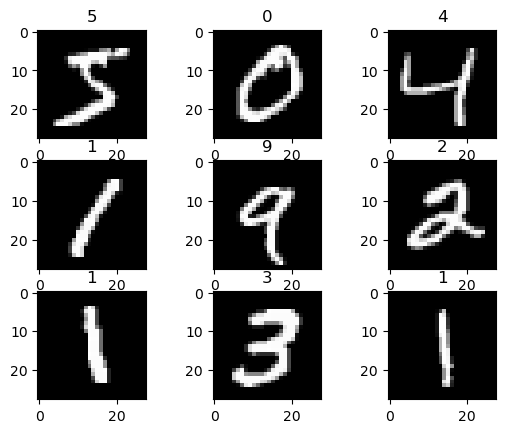

In [8]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(9):
    plt.subplot(3,3,i + 1)
    image, label = train_data[i]
    print(f"Image Shape, {image.shape}")
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
torch.manual_seed(42)
from torch.utils.data import DataLoader

BATCH_SIZE = 32;

train_loader = DataLoader(train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_loader = DataLoader(test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
from torch import nn
class CNNModelVEXE(nn.Module):
    def __init__(self, 
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)                       
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.MaxPool2d(2)  
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features = output_shape,
                      )
        )
    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x;

In [11]:
# model_play = CNNModelVEXE(input_shape=1,
#                           hidden_units=10,
#                               output_shape=len(train_data.classes)).to("mps")
# for batch, (X, y) in enumerate(train_loader):
#     # print(f"-------------{batch}-------------")
#     X, y = X.to("mps"), y.to("mps")
#     y_pred = model_play(X)
#     if (batch == 0):
#         print(y_pred.shape)
#         print(y_pred)
#         print(y.shape)
#         print(y)
#         print(y_pred.argmax().shape)
#         print(y_pred.argmax())



## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
from helper_functions import accuracy_fn
device_gpu = "cuda" if torch.cuda.is_available() else "mps"
device_cpu = "cpu"
torch.manual_seed(42)
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device_gpu):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
def test_step(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device_gpu):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")





In [15]:

model_exe = CNNModelVEXE(input_shape=1,hidden_units=10, output_shape=len(train_data.classes))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_exe.parameters(), lr=1e-3)
from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_model_2 = timer()
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time

    Args:
        start (float): Start time of computation (prefered in timeit format)
        end (float): End time of computation
        device (torch.device, optional): Device that compute is ruunning on. Defaults to None.
    
    Returns:
        float: time between start and end in seconds (higher is longer)    
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time



In [14]:
epochs = 30
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(data_loader=train_loader,
               model=model_exe,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device_gpu)
    test_step(data_loader=test_loader,
              model=model_exe,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device_gpu)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device_gpu)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.26371 | Train accuracy: 91.73%
Test loss: 0.10248 | Test accuracy: 96.93%

Epoch: 1
--------
Train loss: 0.08918 | Train accuracy: 97.27%
Test loss: 0.06436 | Test accuracy: 98.01%

Epoch: 2
--------
Train loss: 0.06553 | Train accuracy: 98.00%
Test loss: 0.06827 | Test accuracy: 97.82%

Epoch: 3
--------
Train loss: 0.05413 | Train accuracy: 98.30%
Test loss: 0.03859 | Test accuracy: 98.84%

Epoch: 4
--------
Train loss: 0.04510 | Train accuracy: 98.58%
Test loss: 0.03942 | Test accuracy: 98.79%

Epoch: 5
--------
Train loss: 0.03910 | Train accuracy: 98.78%
Test loss: 0.03177 | Test accuracy: 99.03%

Epoch: 6
--------
Train loss: 0.03500 | Train accuracy: 98.88%
Test loss: 0.02588 | Test accuracy: 99.21%

Epoch: 7
--------
Train loss: 0.03173 | Train accuracy: 98.99%
Test loss: 0.02062 | Test accuracy: 99.36%

Epoch: 8
--------
Train loss: 0.02774 | Train accuracy: 99.15%
Test loss: 0.02290 | Test accuracy: 99.30%

Epoch: 9
--------
Train loss: 0.02550

In [17]:
model_exe = model_exe.to(device_cpu)
epochs = 30
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    train_step(data_loader=train_loader,
               model=model_exe,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device_cpu)
    test_step(data_loader=test_loader,
              model=model_exe,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device_cpu)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device_cpu)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.06693 | Train accuracy: 97.99%
Test loss: 0.05878 | Test accuracy: 98.19%

Epoch: 1
--------
Train loss: 0.05469 | Train accuracy: 98.35%
Test loss: 0.04516 | Test accuracy: 98.60%

Epoch: 2
--------
Train loss: 0.04660 | Train accuracy: 98.54%
Test loss: 0.03795 | Test accuracy: 98.86%

Epoch: 3
--------
Train loss: 0.04017 | Train accuracy: 98.75%
Test loss: 0.03663 | Test accuracy: 98.81%

Epoch: 4
--------
Train loss: 0.03591 | Train accuracy: 98.86%
Test loss: 0.02856 | Test accuracy: 99.11%

Epoch: 5
--------
Train loss: 0.03242 | Train accuracy: 98.94%
Test loss: 0.03088 | Test accuracy: 99.01%

Epoch: 6
--------
Train loss: 0.02889 | Train accuracy: 99.06%
Test loss: 0.02086 | Test accuracy: 99.31%

Epoch: 7
--------
Train loss: 0.02645 | Train accuracy: 99.12%
Test loss: 0.01684 | Test accuracy: 99.47%

Epoch: 8
--------
Train loss: 0.02401 | Train accuracy: 99.21%
Test loss: 0.01698 | Test accuracy: 99.44%

Epoch: 9
--------
Train loss: 0.02221

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Test sample image shape: torch.Size([1, 28, 28])
 Test sample label: 9 (9 - nine)


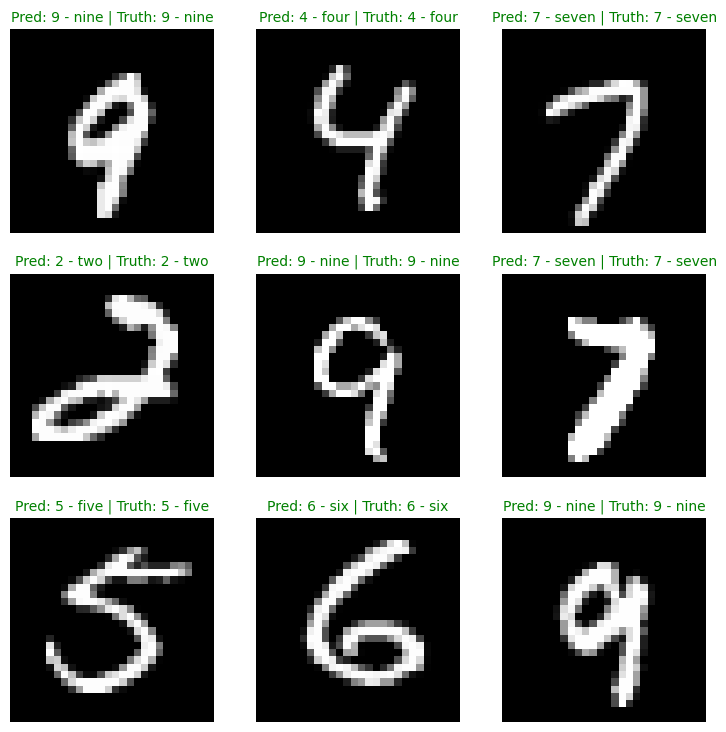

In [31]:
def make_predictions(model: torch.nn.Module, data:list, device: torch.device = device_gpu):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
pred_probs = make_predictions(model=model_exe,
                              data=test_samples)
pred_classes = pred_probs.argmax(dim=1)

print(f"Test sample image shape: {test_samples[0].shape}\n Test sample label: {test_labels[0]} ({train_data.classes[test_labels[0]]})")
plt.figure(figsize=(9,9))

nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = train_data.classes[pred_classes[i]]
    truth_label = train_data.classes[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10,color="green")
    else:
        plt.title(title_text, fontsize=10,color="red")

    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

Making Predictions:   0%|          | 0/1875 [00:00<?, ?it/s]

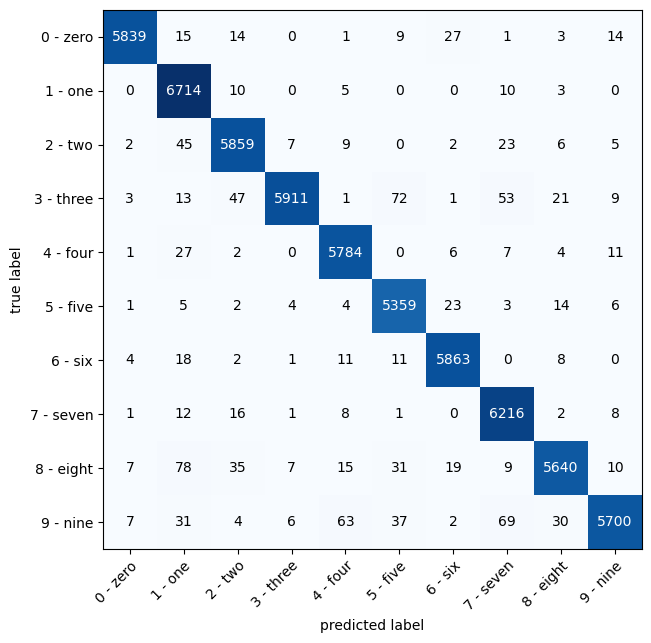

In [32]:
from tqdm.auto import tqdm
y_preds = []
model_exe.eval()
with torch.inference_mode():
    for X, y in tqdm(test_loader, desc="Making Predictions"):
        X, y = X.to(device_gpu), y.to(device_gpu)
        y_logit = model_exe(X)
        y_pred = torch.softmax(y_logit, dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(train_data.classes), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
fig, ax = plot_confusion_matrix(
            conf_mat = confmat_tensor.numpy(),
            class_names=train_data.classes,
            figsize=(10, 7));

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?